In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [2]:
#read the csv file
tdata = pd.read_csv('mountaineeringfacts2018.csv')

In [3]:
#perform basic statistical operations on the data
tdata.describe()

,DAY,MONTH,YEAR
count,5301.000000,5301.000000,5301.000000
mean,19.540841,5.251651,2007.150915
std,5.384541,1.171380,9.323426
min,1.000000,1.000000,1953.000000
25%,17.000000,5.000000,2004.000000
50%,20.000000,5.000000,2009.000000
75%,23.000000,5.000000,2013.000000
max,31.000000,12.000000,2088.000000


In [4]:
#Display initial data records
tdata.head()

,NAME,COUNTRY,DAY,MONTH,YEAR,ROUTE,NAME OF THE TEAM,LEADER
0,TENZING NORGAY,NEPAL,29,5,1953,SOUTHCOL,BRITISH EXPEDITION,Lord John Hunt
1,EDMUND HILLARY,NEW ZEALAND,29,5,1953,SOUTHCOL,BRITISH EXPEDITION,""""
2,ERNST SCHMIED,SWITZERLAND,23,5,1956,SOUTHCOL,SWITZERLAND EXPEDITION,Alber Eggler
3,JUERGE MARMET,SWITZERLAND,23,5,1956,SOUTHCOL,SWITZERLAND EXPEDITION,""""
4,ADOLF REIST,SWITZERLAND,24,5,1956,SOUTHCOL,SWITZERLAND EXPEDITION,""""


In [5]:
#Display final data records
tdata.tail()

,NAME,COUNTRY,DAY,MONTH,YEAR,ROUTE,NAME OF THE TEAM,LEADER
5296,MR. PEMBA RITA SHERPA,NEPAL,27,5,2017,NaN,"""",""""
5297,MR. PASANG GYALZEN,NEPAL,27,5,2017,NaN,“,“
5298,MR. MINGMA DORJI SHERPA,NEPAL,16,5,2017,NaN,"""",""""
5299,MR. DAWA SANGE SHERPA,NEPAL,21,5,2017,NaN,"""",""""
5300,MR. PASANG BHOTE,NEPAL,21,5,2017,NaN,"""",""""


In [6]:
#Find out which columns have numerical features
numeric_features = tdata.select_dtypes(include=[np.number])
numeric_features.columns

Index(['DAY', 'MONTH', 'YEAR'], dtype='object')

In [7]:
#Find out which columns have categorical features
categorical_features = tdata.select_dtypes(include=[np.object])
categorical_features.columns

<ipython-input-7-64be3bf4a0a1>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = tdata.select_dtypes(include=[np.object])


Index(['NAME', 'COUNTRY', 'ROUTE', 'NAME OF THE TEAM', 'LEADER'], dtype='object')

<AxesSubplot:>

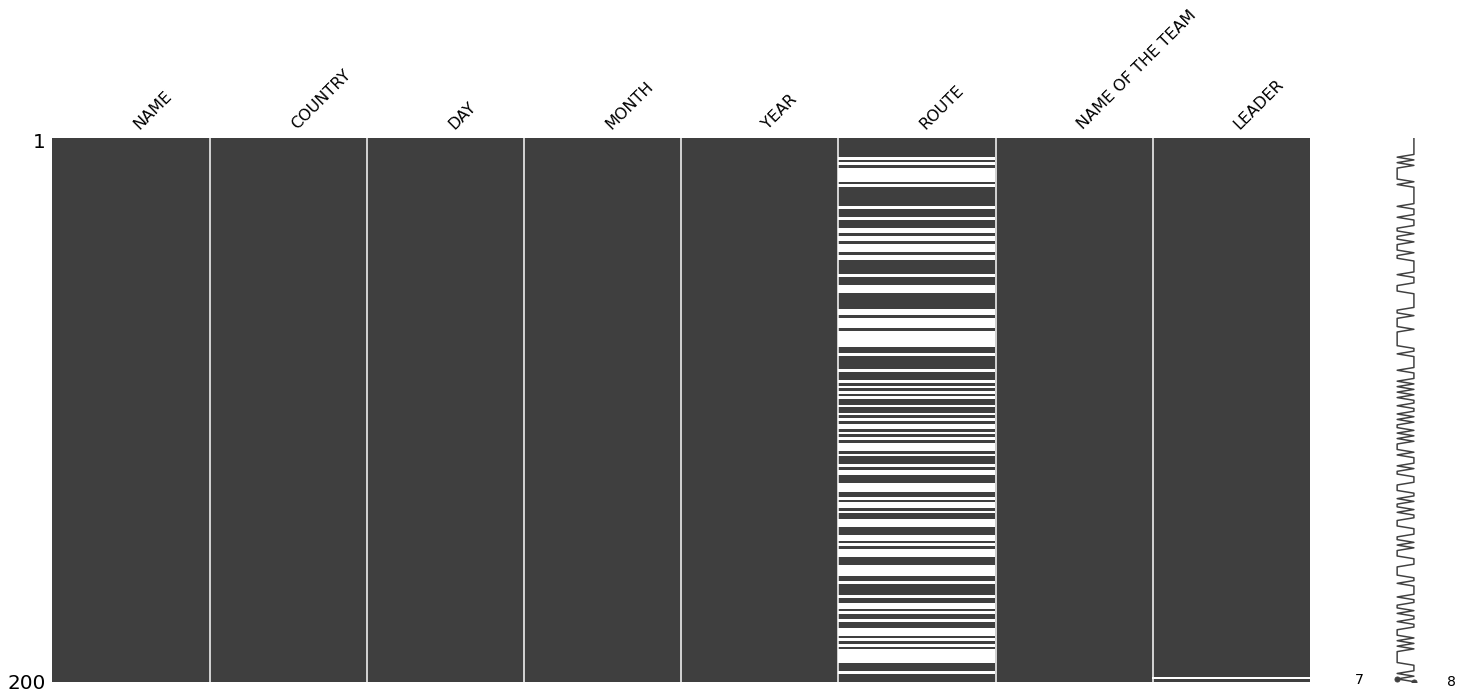

In [8]:
#Display matrix of sample size 200 to see the features with more missing values
msno.matrix(tdata.sample(200))

<AxesSubplot:>

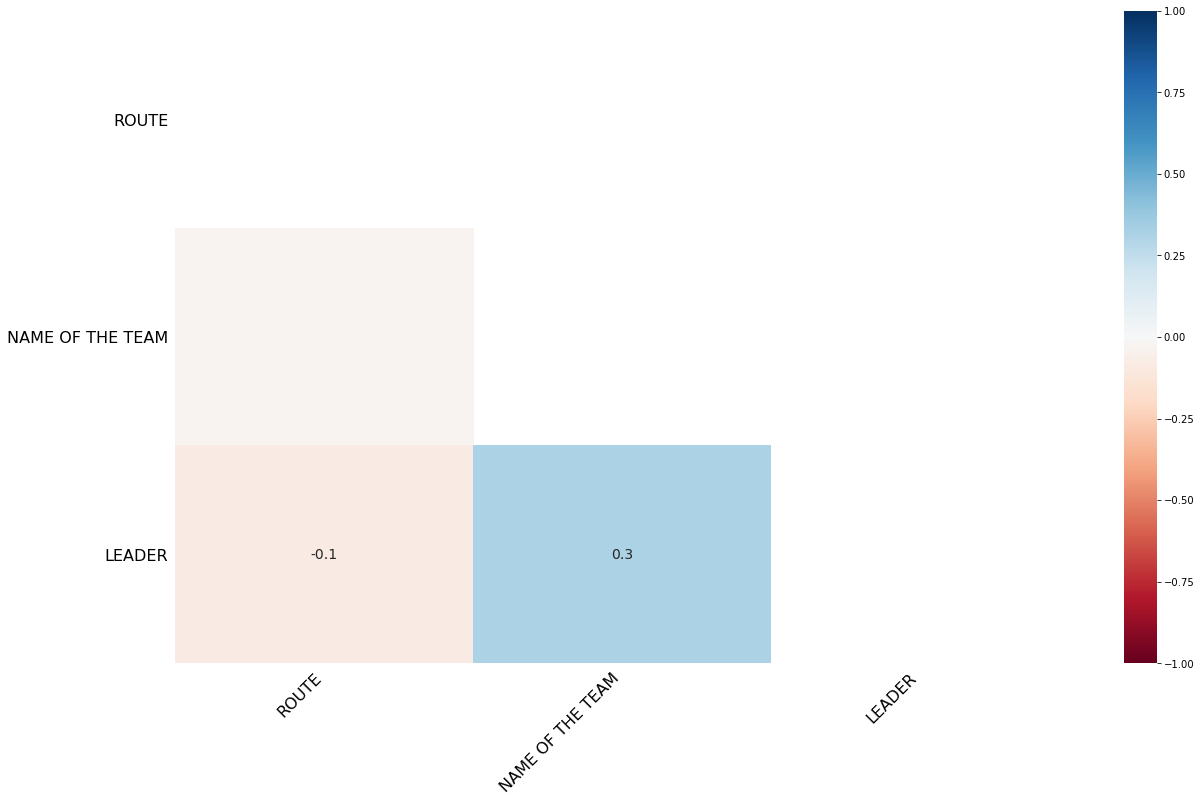

In [9]:
#Display the nullity correlation: how strongly the presence or absence of one variable affects the presence of another
msno.heatmap(tdata)

In [10]:
#Estimate skewness and kurtosis
tdata.skew(), tdata.kurt()

(DAY     -1.007718
 MONTH    3.432985
 YEAR    -1.167900
 dtype: float64,
 DAY       1.498636
 MONTH    13.110371
 YEAR      7.719178
 dtype: float64)

C:\Users\Omen\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Omen\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Omen\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

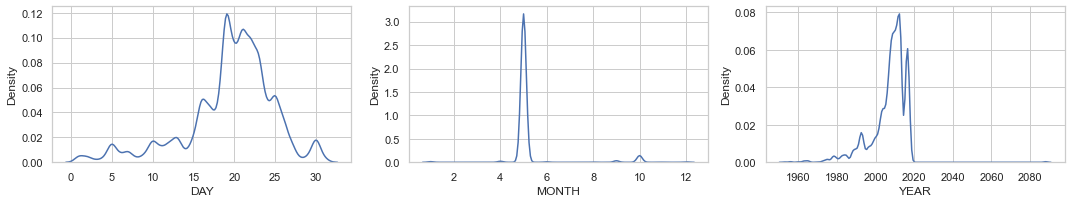

In [11]:
#Using Distplot to visualize distribution of numerical features
fig = plt.figure(figsize = (20,25))
sns.set(style = 'whitegrid')
for i in range(len(numeric_features.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.distplot(numeric_features.iloc[:,i].dropna(), hist = False, kde_kws = {'bw_method':0.1}, color = 'b')
    plt.xlabel(numeric_features.columns[i])
plt.tight_layout()

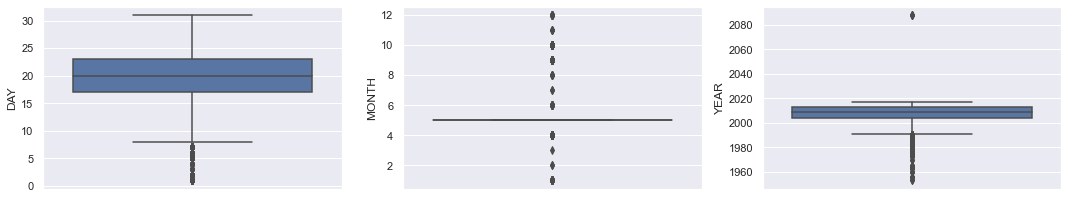

In [12]:
#Using boxplot to see if numeric features have outliers
fig = plt.figure(figsize = (20,25))
sns.set(style = 'darkgrid')
for i in range(len(numeric_features.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.boxplot(y = numeric_features.iloc[:,i].dropna())
plt.tight_layout()

C:\Users\Omen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Omen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


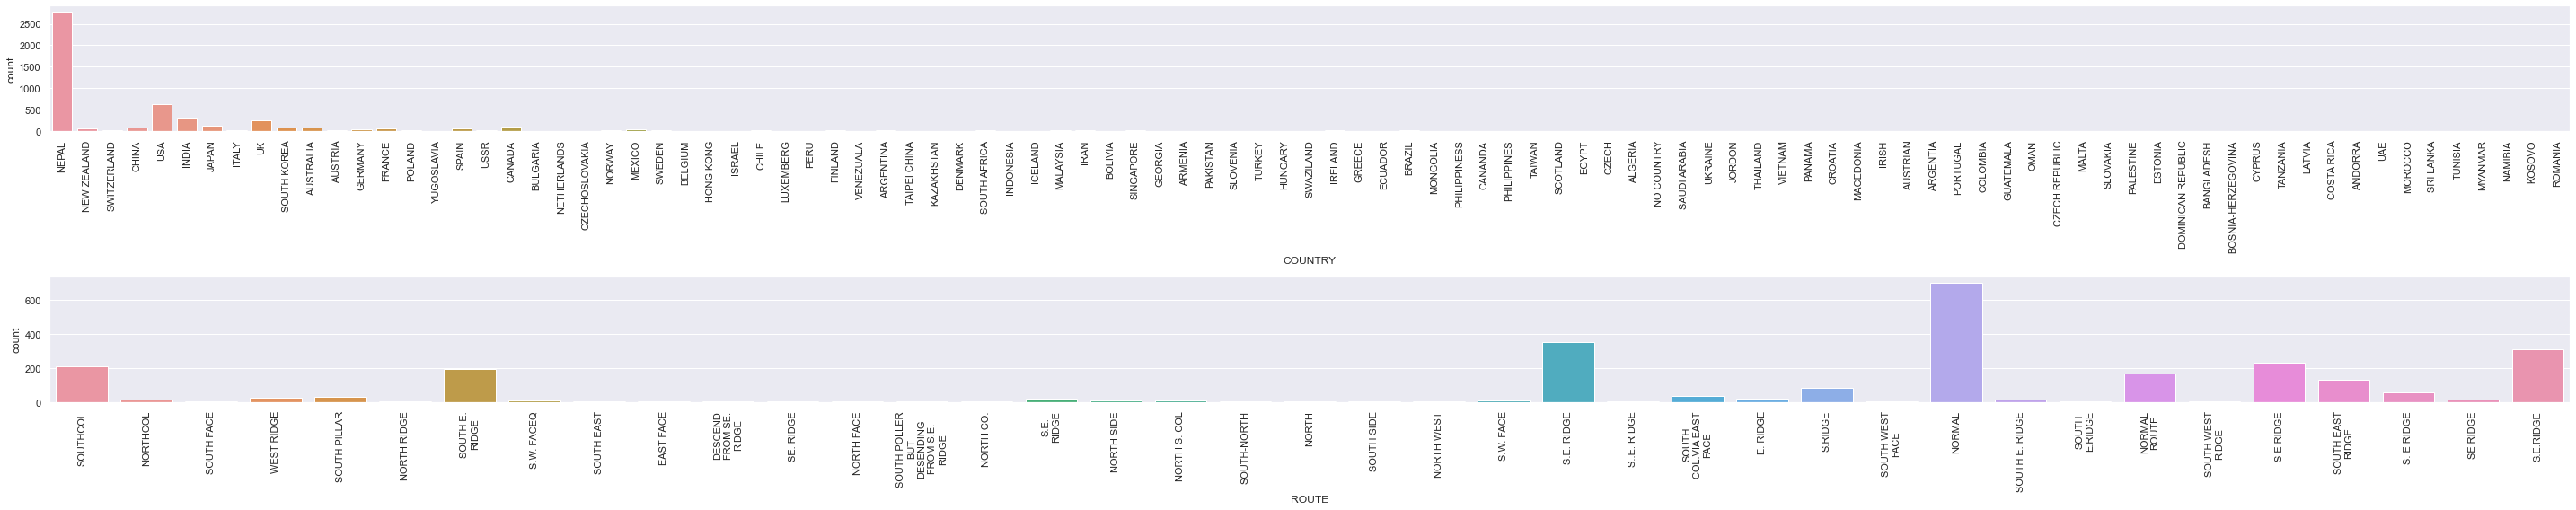

In [13]:
#create bar graph for counting records by country and route
cf1 = categorical_features[["COUNTRY", "ROUTE"]]
fig = plt.figure(figsize = (40,40))
for i in range(len(cf1.columns)):
    fig.add_subplot(10, 1, i+1)
    ax = sns.countplot(cf1.iloc[:,i].dropna())
    plt.xticks(rotation = 90)
plt.tight_layout()

In [14]:
#Check to see the frequency of top occuring value
categorical_features.describe().T.freq.sort_values(ascending = False)

NAME OF THE TEAM    4604
LEADER              4598
COUNTRY             2785
ROUTE                704
NAME                  15
Name: freq, dtype: object

In [15]:
tdata.fillna('None', inplace = True)

In [16]:
tdata.select_dtypes(include = 'object').isna().mean().sort_values(ascending = False)

NAME                0.0
COUNTRY             0.0
ROUTE               0.0
NAME OF THE TEAM    0.0
LEADER              0.0
dtype: float64